# Основы SciPy

<img src="https://scipy.github.io/devdocs/_static/logo.svg" width="200" height="200"> 

**Python**, как автомат калашникова, уже давно верой и правдой служит людям в разных жизненных обстоятельствах. Но особую любовь он сыскал у людей **науки**. Простота языка и большое количество библиотек на все случае жизни сделали Python завсегдатым в области научных вычислений и нейронных сетей. Хочешь строить графики - есть библиотека **Matplotlib**. Нужно работать с матрицами - устанавливай **NumPy**. Манипулируешь людми, а хочется манипулировать данными - **Pandas** в помощь. Но ты можешь меня спросить: "А вот математику считать твой Python может? Производные там, интегралы, методы оптимизации. Не, я, конечно, и сам могу на листочке посчитать, всё-таки два года в универе матан изучал, но хотелось бы как-то автоматизировать". А я тебе отвечу:"Есть одно средство. О нем сегодня и пойдёт речь". 

В этом занятии мы поговорим:
* зачем нужна библиотека **SciPy**;
* как установить SciPy с помощью пакетных менеджеров **pip** и **conda**;
* какой вообще функционал есть в этом модуле, какие математические и научные задачи ты сможешь решить с его помощью.

Мы разберём основные моменты работы с библиотекой и наиболее часто используемые на практике функции. Разумеется, всё это с примерами кода. В тонкости лезть не будем. И, конечно же, здесь мы не сможем посмотреть все функции. Если вам нужно будет углубиться или найти что-то конкретное, поняв общую структуру модуля, вы с лёгкостью сможете найти все интересующуе вас вещи в **документации** (https://scipy.github.io/devdocs/index.html).


## SciPy

**SciPy** - это библиотека, которая содержит набор математических алгоритмов и функций, построенных на основе библиотеки NumPy. Она редоставляя пользователю готовые функции и классы для математических вычислений и манипулирования данными. Обычно SciPy используют с библиотеками Matplotlib, NumPy, Pandas. Язык Python в связке с этими библиотеками вполне может конкурировать со специальными математическими пакетами и системами такими как **MATLAB, Octave, SciLab, Maple** и прочими. Некоторые из которых даже платные.

## Установка SciPy и вспомогательных библиотек

Для установки SciPy с помощью pip воспользуемся командой: ```pip install scipy``` или,
```python -m pip install scipy```, или ```python3 -m pip install scipy```, или ```py.exe -m pip install scipy```

В случае если вы пользуетесь conda: ```conda install scipy```

Также установим библиотеки NumPy, Matplotlib и Pandas:
```
python -m pip install numpy
python -m pip install matplotlib
python -m pip install pandas
```

Что бы запустить установку в Jupyter Notebook в ячейке типа Код перед командой ставим **!**:

In [1]:
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install pandas

/home/lex/code/learning/bfu/prog_in_ai/.venv/bin/python: No module named pip
/home/lex/code/learning/bfu/prog_in_ai/.venv/bin/python: No module named pip
/home/lex/code/learning/bfu/prog_in_ai/.venv/bin/python: No module named pip


Сразу договоримся, что испортировать модули мы будем согласно негласному соглашению сообщества разработчиков:

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Структура SciPy

Пакет SciPy состоит из **подпакетов**, которые отвечают за различные области научных вычислений. Библиотека опирается на работу с многомерными массивами типа **ndarray** из библиотеки NumPy.

Организация подпакетов следующая:

Название|	Описание|
--------|-----------|
cluster|	Алгоритмы кластерного анализа|
constants|	Физические и математические константы|
fftpack|	Быстрое преобразование Фурье|
integrate|	Решения интегральных и обычных дифференциальных уравнений|
interpolate|	Интерполяция и сглаживание сплайнов|
io|	Ввод и вывод|
linalg|	Линейная алгебра|
ndimage|	N-размерная обработка изображений|
odr|	Метод ортогональных расстояний|
optimize|	Оптимизация и численное решение уравнений|
signal|	Обработка сигналов|
sparse|	Разреженные матрицы|
spatial|	Разреженные структуры данных и алгоритмы|
special|	Специальные функции|
stats|	Статистические распределения и функции|

Чтобы пользоваться функциями из подпакета его надо импортировать отдельно:

In [3]:
from scipy import linalg

Для того, чтобы постоянно не смотреть в документацию есть несколько специальных справочных функций, которые можно вызывать прямо в коде: **help** и **source**.

**help()** - позволяет получить информацию о любой функции из пакета или информацю о подпакете:

In [4]:
help(linalg) # информация о подпакете linalg

Help on package scipy.linalg in scipy:

NAME
    scipy.linalg

DESCRIPTION
    Linear algebra (:mod:`scipy.linalg`)

    .. currentmodule:: scipy.linalg

    .. toctree::
       :hidden:

       linalg.blas
       linalg.cython_blas
       linalg.cython_lapack
       linalg.interpolative
       linalg.lapack

    Linear algebra functions.

    .. eventually, we should replace the numpy.linalg HTML link with just `numpy.linalg`

    .. seealso::

       `numpy.linalg <https://www.numpy.org/devdocs/reference/routines.linalg.html>`__
       for more linear algebra functions. Note that identically named
       functions from `scipy.linalg` may offer more or slightly differing
       functionality.


    Basics

    .. autosummary::
       :toctree: generated/

       inv - Find the inverse of a square matrix
       solve - Solve a linear system of equations
       solve_banded - Solve a banded linear system
       solveh_banded - Solve a Hermitian or symmetric banded system
       solve_ci

In [5]:
help(linalg.inv) # информация о функции, которое вычисляет обратную матрицу

Help on function inv in module scipy.linalg._basic:

inv(a, overwrite_a=False, check_finite=True, *, assume_a=None, lower=False)
    Compute the inverse of a matrix.

    If the data matrix is known to be a particular type then supplying the
    corresponding string to ``assume_a`` key chooses the dedicated solver.
    The available options are

    =============================  ================================
     general                        'general' (or 'gen')
     diagonal                       'diagonal'
     upper triangular               'upper triangular'
     lower triangular               'lower triangular'
     symmetric positive definite    'pos'
     symmetric                      'sym'
     Hermitian                      'her'
    =============================  ================================

    For the 'pos' option, only the triangle of the input matrix specified in
    the `lower` argument is used, and the other triangle is not referenced.
    Likewise, an expli

Функция **source** позволяет посмотреть исходный код функции:

## Специальные функции (scipy.special)

Подпакет **scipy.special** содержит набор  специальных функций математической физики: тригонометрические функции, обратные тригонометрические функции, логарифмические функции и экспоненциальные функци, эллиптические функции, гамма, бета, Бесселя, Струви, Келвина, гипергеометрические и т.д. Ещё есть несколько функции статистики, которые не предназначены для общего использования (то есть они не попали в stats).

In [6]:
from scipy import special
 
sin_of_nity_degrees = special.sindg(90) # пример попроще - синус 90 градусов
print(sin_of_nity_degrees)

1.0


In [7]:
def _vratio(u, ineps, mp):
    [s, c, d, phi] = special.ellipj(u, mp) # пример посложнее - Эллиптические функции Якоби
    ret = abs(ineps - s / c)
    return ret  

Подробнее со всеми функциями пакета и параметрами функций можно ознакомиться в документации: https://scipy.github.io/devdocs/reference/special.html#module-scipy.special

## Интегральные функции (scipy.integrate)

**scipy.integrate** —  это про численное интегрирование (методы трапеции, Симпсона, Ромберга и др.), решение обыкновенных дифференциальных уравнений (ОДУ); функции для решения интегралов.

В модуле **scipy.integrate** есть несколько функций для вычисления определённых интегралов. Наиболее простой является
функция **quad()**, которая вычисляет обычный интеграл от одной переменной и имеет следующий синтаксис:
```quad (func, a, b, …)```, где:
* func — имя подынтегральной функции
* a — нижний предел интегрирования 
* b — верхний предел интегрирования

Например посчитаем интеграл: $$\int_{0}^{4}3{x}^{2}dx$$

In [8]:
from scipy import integrate

def target_function_f(x):
    return 3.0 * x ** 2

result = integrate.quad(target_function_f, 0.0, 4.0)
print(result)

(64.0, 7.105427357601002e-13)


Функция **quad()** возвращает кортеж из двух элементов, первый — значение интеграла, второй — точность вычисления. В данном случае  получен с точностью до 13-го знака после запятой. Есть и другие методы нахождения интегралов: **trapz() (метод трапеций), sims() (метод Симпсона), romb() (метод Ромберга)** и т.д.

Также давайте посмотрим как решить простенькое **ОДУ**: $$\frac{dx}{dy}=-2y$$

Для этого есть функция **odeint()** следующего вида: ```odeint(func, y0, x, …)```, где:
* func — список функций правых частей уравнений;
* y0 — список начальных условий;
* x — массив точек, в которых необходимо найти значение искомой функции $\bar{y}(x)$;
* многоточием обозначены необязательные аргументы.

Функция **odeint()** возвращает двумерный массив типа **ndarray** значений функции $y$ во всех заданных точках $x$. Начальное значение y0 хранится в первой строке. Массив решения имеет следующую форму (shape): (len(x), len(y0)). То есть число строк равно количеству точек интегрирования, число столбцов — количеству уравнений. 

Например, в случае интегрирования одного уравнения результатом работы функции **odeint()** будет **двумерный массив**, содержащий один столбец, в котором хранятся значения искомой функции, начиная с y0.

In [9]:
from scipy import integrate
import numpy as np

def target_function(y, x):
    return -2.0 * y

xi = np.linspace(0, 1, 10)
y0 = 1.0
result = integrate.odeint(target_function, y0, xi)
print(result)

[[1.        ]
 [0.80073742]
 [0.64118042]
 [0.51341714]
 [0.41111231]
 [0.329193  ]
 [0.26359714]
 [0.21107209]
 [0.16901331]
 [0.13533527]]


Можно также решать и системы ОДУ. Держу в курсе.

*Пример из книги ОСНОВЫ НАУЧНЫХ РАСЧЁТОВ НА ЯЗЫКЕ ПРОГРАММИРОВАНИЯ PYTHON С. А. Хайбрахманов:*

Уравнение гармонических колебаний: $\frac{d^2x}{dt^2}+\omega^2x=0$ c начальными условиями $x(0) = {x}_{0} = –5$, $\frac{dx}{dt(0)} = {v}_{0} = 0$ при $\omega=1.5$. Сведим данное уравнение второго порядка к системе двух уравнений первого порядка с помощью замены: $\frac{dx}{dt}=v, \frac{dv}{dt}=\frac{d^2x}{dt^2}$. Тогда получим: $\frac{dv}{dt}=-\omega^2x, \frac{dx}{dt}=v$ c начальными условиями $x(0) = {x}_{0}, v(0) = {v}_{0}$.

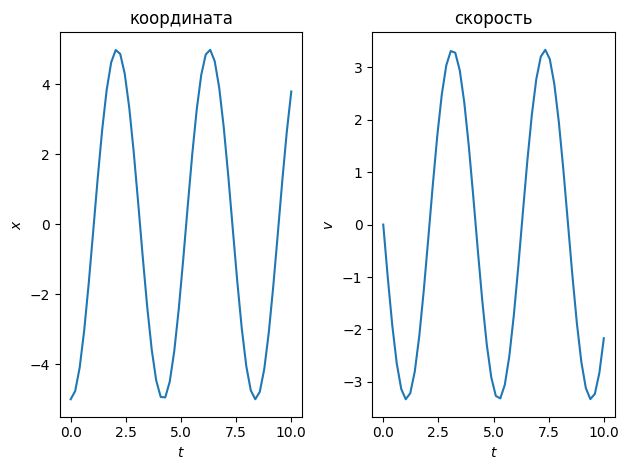

In [10]:
from scipy import integrate
import numpy as np
from matplotlib import pyplot as plt

# частота гармонического осциллятора
w = 1.5
# вектор-функция правых частей уравнений:
# f = [f0, f1], где f0 = -w^2*x, f1 = v.
# полагается, что f зависит от (y, t), причём y - это
# список из двух чисел:
# y = [v, x]
def f(y, t):
 v = y[0]
 x = y[1]
 f0 = -w ** 2 * x
 f1 = v
 return [f0, f1]

# массив точек интегрирования
ti = np.linspace(0, 10, 50)

# начальная координата
x0 = -5.0

# начальная скорость
v0 = 0.0
# список начальных условий
y0 = [x0, v0]

# решение ОДУ
sol = integrate.odeint(f, y0, ti)

# рисунок для построения графиков функций x(t) и v(t)
fig = plt.figure()

# панель для рисования графика координаты
ax1 = fig.add_subplot(121)

# панель для рисования графика скорости
ax2 = fig.add_subplot(122)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$x$')
ax1.set_title('координата')

# график x(t) - зависимость нулевого столбца вектора
# решения sol от ti
ax1.plot(ti, sol[:, 0])
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$v$')
ax2.set_title('скорость')

# график v(t) - зависимость первого столбца вектора
# решения sol от ti
ax2.plot(ti, sol[:, 1])

# настройка оптимального расположения панелей
plt.tight_layout()
fig.savefig("ode2.png")

Кстати, если тебе интересно, как оформлять текст в Jupyter, писать формулы, вставлять картинки и т.д. То советую глянуть два моих ролика:
* Основы Jupyter Notebook (Python) - https://www.youtube.com/watch?v=s0q2GpcYxo4
* Основы Markdown - https://www.youtube.com/watch?v=NXNf9aYTCZ0

А если хочешь реально разобраться во всех этих интегралах и производных, то рекомендую посмотреть ролики на канале **miracle6** - https://www.youtube.com/c/miracl6. Настя очень понятно объясняет за базовые математические штуки. Профессиональный Data Scientist всё-таки. Поэтому ознакомьтесь. 

## Интерполяция (scipy.interpolate)

Если по простому,то **интерполяция** — это построение новых точек на основе известных. **scipy.interpolate** содержится набор функций для интерполяции одномерных и многомерных данных. Интерполяции одномерного набора данных возможна с помощью функции **interp1d()**. Синтаксис: ```fi = interp1d(x, f0, 'method', …)```. Функция **interp1d()** принимает в качестве первых двух аргументов одномерные массивы координат $x$ и соответствующих значений некоторой величины f0. 

Реализовано несколько способов интерполяции: 
* линейная ('method'='linear');
* квадратичная('method'='qudratic');
* кубическая ('method'='cubic') и т.д.

По умолчанию, когда параметр **'method'** не указан, используется линейная интерполяция. См. документацию. 

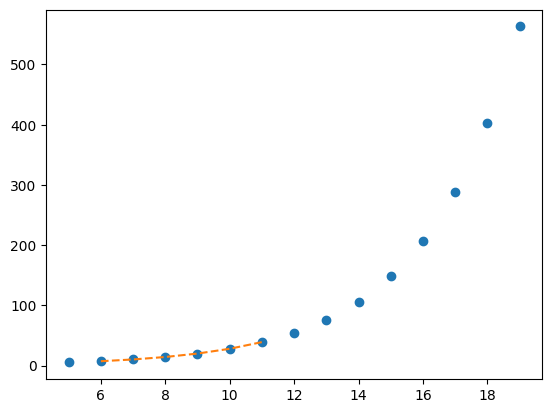

In [11]:
# пример попроще
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.arange(5, 20)
y = np.exp(x/3.0)

f = interpolate.interp1d(x, y)

x1 = np.arange(6, 12)
y1 = f(x1)   # использовать функцию интерполяции, возвращаемую `interp1d`

plt.plot(x, y, 'o', x1, y1, '--') # o - исходня функция, -- - то, что мы наинтерполировали
plt.show()

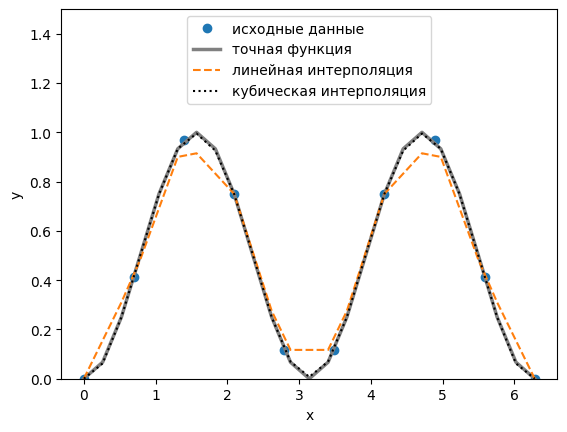

In [12]:
# пример посложнее 
"""
Интерполяция одномерных данных
@author: С.А. Хайбрахманов
"""
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# функция для генерации данных,
# по которым будет строиться интерполяция
def f_exact(x):
 return np.sin(x)**2

# массив координат, по которым будет делаться интерполяция
x = np.linspace(0, 2.0 * np.pi, 10)

# массив значений, по которым будет делаться интерполяция
y = f_exact(x)

# интерполяция данных методом по умолчанию
# (линейная интерполяция)
fi_1 = interp1d(x, y)

# кубическая интерполяция
fi_2 = interp1d(x, y, 'cubic')

# массив координат для построения
# графика интерполированных функций
xi = np.linspace(0, 2.0 * np.pi, 25)

# массивы значений интерполированых функций
# для построения графиков
yi_1 = fi_1(xi)
yi_2 = fi_2(xi)

# настройки осей
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0.0, 1.5)

# рисование графиков
plt.plot(x, y, 'o', label='исходные данные')
plt.plot(xi, f_exact(xi), '-', color='grey', linewidth=2.5, label='точная функция')
plt.plot(xi, yi_1, '--', label='линейная интерполяция')
plt.plot(xi, yi_2, 'k:', label='кубическая интерполяция')

# легенда, располагающаяся сверху по центру панели
plt.legend(loc='upper center')
plt.show()

Кстати, если ты не понимаешь как здесь происходит построение граифков, то советую посмотреть мой ролик по основам библиотеки Matplotlib: https://www.youtube.com/watch?v=RAXDcUrFD2o

## Оптимизация (scipy.optimize)

**scipy.optimize** предстявляет набор функций, которые реализуют популярные алгоритмы оптимизаци: максимизация, минимизация функции, подбор кривой, поиск корня и т.д.

Чуть подробнее:
* Неограниченная и ограниченная минимизация многомерных скалярных функций, то есть minimize (например, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, метод сопряженных градиентов, метод Нелдера — Мида и так далее);
* Глобальная оптимизация (дифференциальная эволюция, двойной отжиг и т. д.);
* Минимизация наименьших квадратов и подбор кривой (метод наименьших квадратов, приближение с помощью кривых и т. д.);
* Минимизаторы скалярных одномерных функций и численное решение уравнений (минимизация скаляра и скаляр корня);
* "Решатели" систем многомерных уравнений с помощью таких алгоритмов, как Пауэлла, Левендберга — Марквардта и ещё куча всего.

Пусть у нас есть какая-то функция $f(x)=x^2+10sin(x)$. Найдём её **минимум**:

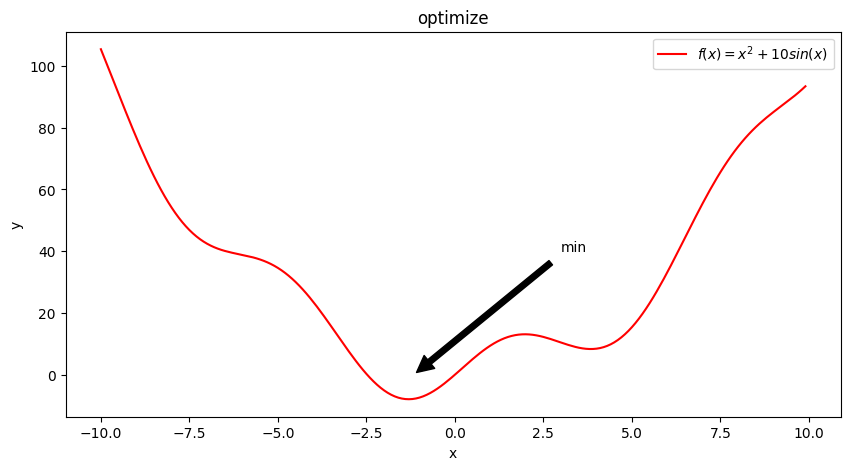

In [13]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
 
def target_function(x):
    return x ** 2+10*np.sin(x)
 
# график целевой функции
plt.figure(figsize=(10,5))
x = np.arange(-10, 10, 0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('optimize')
plt.plot(x, target_function(x), 'r-', label='$f(x)=x^2+10sin(x)$')

 # Наименьшее значение функции точки на изображении
a = -1.3 # a = f(-1.3)

plt.annotate('min',xy=(-1.3,a),xytext=(3,40),arrowprops=dict(facecolor='black',shrink=0.05))
plt.legend()
plt.show()

Далее классический пример минимум функции Розенброка **методом наименьших квадратов**:

In [14]:
# функция Розенброка
def fun_rosenbrock(x):
   return np.array([10 * (x[1] - x[0] ** 2), (1 - x[0])])
   
from scipy.optimize import least_squares

input_data = np.array([2, 2])
result = least_squares(fun_rosenbrock, input_data)

print(result)

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 4.441e-15  1.110e-16]
           x: [ 1.000e+00  1.000e+00]
        cost: 9.866924291084687e-30
         jac: [[-2.000e+01  1.000e+01]
               [-1.000e+00  0.000e+00]]
        grad: [-8.893e-14  4.441e-14]
  optimality: 8.892886493421953e-14
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 3
        njev: 3


Ну и на последок посомтрим на **поиск корней**. Для нахождения кореней уравнений используется функция ```scipy.optimize.root(fun, x0, args=(), method='hybr, ...```, где:
* fun - целевая функция;
* x0 - начальное значение;
* args - дополнительные аргументы, которые передаются целевой функции и ее якобиану;
* method - метод решения (например, hybr - гибридный метод Пауэлла и lm - метод Левенберга-Марквардта).

Решим трансцендентное уравнение с одной переменной $x^2+2cos(x)=0$ с начальным значением ${x}_{0}=0.3$:

In [15]:
from scipy.optimize import root

def target_function(x):
   return x ** 2 + 2 * np.cos(x)

x0 = 0.3
result = root(target_function, x0)
print(result)

 message: The iteration is not making good progress, as measured by the 
           improvement from the last ten iterations.
 success: False
  status: 5
     fun: [ 2.000e+00]
       x: [-6.991e-03]
  method: hybr
    nfev: 16
    fjac: [[-1.000e+00]]
       r: [-7.642e-05]
     qtf: [-2.000e+00]


## Функции преобразования Фурье (scipy.fft)

**Преобразование Фурье** вычисляется на сигнале временной области, чтобы проверить его поведение в частотной области. Применяется при обработке сигналов и шумов, обработка изображений, обработка аудиосигналов и т.д. 

SciPy предлагает модуль **fftpack**, который позволяет пользователю быстро вычислять преобразования Фурье. Функции **fft** используются для получения дискретной трансформации Фурье реальной или комплексной последовательности.

**scipy.fftpack** использует:
* scipy.fftpack.fftfreq (): создать последовательность выборки;
* scipy.fftpack.fft (): вычислить быстрое преобразование Фурье.

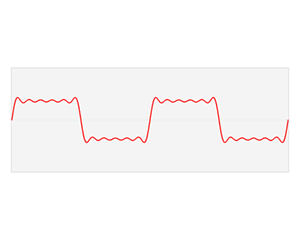

In [16]:
from scipy.fftpack import fft, ifft

data = np.array([0, 1, 2, 3])

result = fft(data)
print(result)

[ 6.-0.j -2.+2.j -2.-0.j -2.-2.j]


## Обработка сигналов (scipy.signal)

**scipy.signal** - функции обработки сигналов и некоторые функции фильтрации,инструменты проектирования фильтров и несколько алгоритмов интерполяции B-сплайнов для одномерных и двумерных данных. 

**Обработка сигналов** — это область анализа, модификации и синтеза сигналов: звуков, изображений и т. д. 

**Фильтрация**:
Фильтруя сигнал, можно удалить нежелаемые составляющие. Для выполнения упорядоченной фильтрации используется функция ```order_filter```. Она выполняет операцию на массиве: ```order_filter(a, domain, rank)```, где:
* a — N-мерный массив с входящими данными;
* domain — массив масок с тем же количеством размерностей, что и у массива a;
* rank — неотрицательное число, которое выбирает элементы из отсортированного списка (0, 1…).

In [17]:
from scipy import signal

x = np.arange(35).reshape(7, 5)

domain = np.identity(3)

print(x,end='nn')
print(signal.order_filter(x, domain, 1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]nn[[ 0  1  2  3  0]
 [ 5  6  7  8  3]
 [10 11 12 13  8]
 [15 16 17 18 13]
 [20 21 22 23 18]
 [25 26 27 28 23]
 [ 0 25 26 27 28]]


**Сигналы**

Подпакет **scipy.signal** также состоит из функций, с помощью которых можно генерировать сигналы. Одна из таких — **chirp**. Она является генератором частотно-модулированного сигнала: ```chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)```:

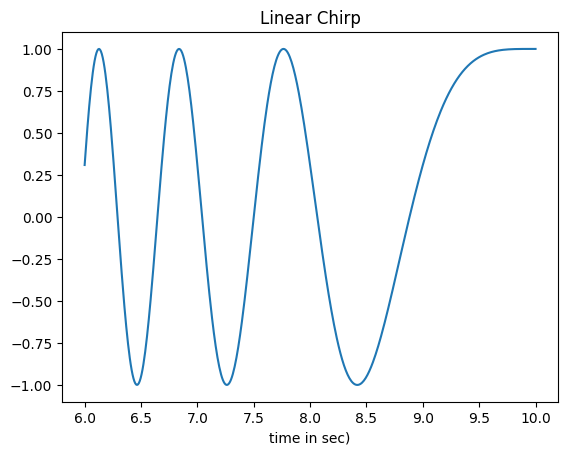

In [18]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt

t = np.linspace(6, 10, 500)

w = chirp(t, f0=4, f1=2, t1=5, method='linear')

plt.plot(t, w)
plt.title("Linear Chirp")
plt.xlabel('time in sec)')
plt.show()

## Константы (scipy.constants)

Пакет **scipy.constants** предоставляет различные математические и физические константы.

In [19]:
from scipy import constants

print("sciPy - pi = %.16f" % constants.pi)

sciPy - pi = 3.1415926535897931


Доступны такие константы как **Пи, золотое сечение, скорость света, гравитационная постоянная G(постоянная Ньютона), e, масса протона** и т.д.

In [20]:
# решим простую задачу за 7 класс физики. Масса человека 68 кг. Нужно найти его вес.
# ускорение свободного падения считать стандартным

mass = 68
print('P = m * g')
print('G: ', constants.g)
print('Мой вес:', mass * constants.g, 'H')

P = m * g
G:  9.80665
Мой вес: 666.8521999999999 H


## Линейная алгебра (scipy.linalg)

**Линейная алгебра** - это про уравнения, их представление с помощью векторных пространств и матриц. Функции из области линейной алгебры есть и в **numpy.linalg**, но **scipy.linalg** будет пожирнее. 

Так функция **scipy.linalg.solve** решает **линейное уравнение** вида $ax+by=Z$ для неизвестных значений $x$, $y$. Рассмотрим на примере. **Решим следующую систему уравнений**: \begin{matrix}
 &  & \\ x+3y+5z=10
 &  & \\ 2x+5y+z=8
 &  & \\ 2x+3y+8z=3
\end{matrix}.

In [21]:
from scipy import linalg
import numpy as np

# записываем коэффиценты левой части
a = np.array([[1, 3, 5], 
              [2, 5, 1], 
              [2, 3, 8]])

# записываем ответы из правой части
b = np.array([10, 
              8, 
              3])

result = linalg.solve(a, b)
print(result)

[-9.28  5.16  0.76]


Соответственно, x=-9.28, y=5.16, z=0.76.

Теперь попробуем вычислить **определитель матрицы**: $ A=\begin{pmatrix}
 1 & 2 \\ 
 3 & 4
\end{pmatrix}$

In [22]:
from scipy import linalg
import numpy as np

# матрица
A = np.array([[1,2],
              [3,4]])

deter = linalg.det(A)
print(deter)

-2.0


Функция **scipy.linalg.eig** возвращает **собственные значения и собственные векторы** матрицы. Например, найдём такоевые для $ A=\begin{pmatrix}
 1 & 2 \\ 
 3 & 4
\end{pmatrix}$

In [23]:
A = np.array([[1,2],
              [3,4]])

l, v = linalg.eig(A)

# собственные значения
print(l)
print()
# векторы
print(v)

[-0.37228132+0.j  5.37228132+0.j]

[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


Функция **scipy.linalg.svd** отвечает за **сингулярное разложение матрицы** на две унитарные матрицы $U$ и $V$ и одномерный массив $s$ сингулярных значений.

In [24]:
from scipy import linalg
import numpy as np

# создадим случайную матрицу
a = np.random.randn(3, 2) + 1.j*np.random.randn(3, 2)
print(a)
print()
# применяем svd
U, s, Vh = linalg.svd(a)

print (U, Vh, s, sep='\n\n')

[[-0.32513177-0.12517512j  1.33877579+0.39313836j]
 [-0.51702362+0.39989537j  0.28557892-0.44324051j]
 [-0.75153078-1.16102878j -0.04847669+2.13403427j]]

[[-0.45885645+0.03965915j -0.59745366+0.3175331j  -0.13250865+0.55905386j]
 [-0.10707207+0.21951721j  0.6258779 -0.13806562j -0.5047628 +0.52419178j]
 [-0.37479797-0.76664996j  0.35501022+0.07351416j  0.33670896+0.16420966j]]

[[ 0.49175217+0.j         -0.79012369-0.36590212j]
 [-0.87073521+0.j         -0.4462264 -0.2066451j ]]

[2.96723054 0.66203215]


Функция **linalg.inv** позволяет найти **обратную матрицу**:

In [25]:
A = np.array([[1,2], 
              [4,3]])
print('Первоначальная матрица A:')
print(A)

B = linalg.inv(A)

print('\nОбратная А матрица:')
print(B)

Первоначальная матрица A:
[[1 2]
 [4 3]]

Обратная А матрица:
[[-0.6  0.4]
 [ 0.8 -0.2]]


## Разреженные структуры данных и алгоритмы (пространственные) (scipy.spatial)

**Разреженные данные** состоят из объектов, которые в свою очередь состоят из линий, точек, поверхностей и так далее. scipy.spatial может вычислять триангуляции, диаграммы Вороного и выпуклые оболочки множества точек и т.д.

Кроме того, он содержит реализации **KDTree** для запросов точек ближайшего соседа и утилиты для вычисления расстояний в различных метриках.

Например, поглядим на **триангуляции Делоне**. Триангуляции Делоне - это точки на плоской поверхности — это триангуляция, где ни одна точка из представленных не расположена внутри описанной окружности любого треугольника.

[[3 2 1]
 [3 1 0]]


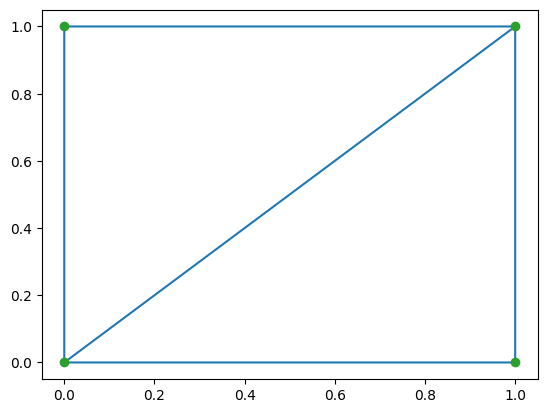

In [26]:
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# точки
points = np.array([[0, 1], [1, 1], [1, 0],[0, 0]])

a = Delaunay(points)       # Объект Делоне
print(a)
print(a.simplices)

plt.triplot(points[:,0], points[:,1], a.simplices)
plt.plot(points[:,1], points[:,0], 'o')
plt.show()

Можно ещё глянуть на использование **диаграмм Воронова**:

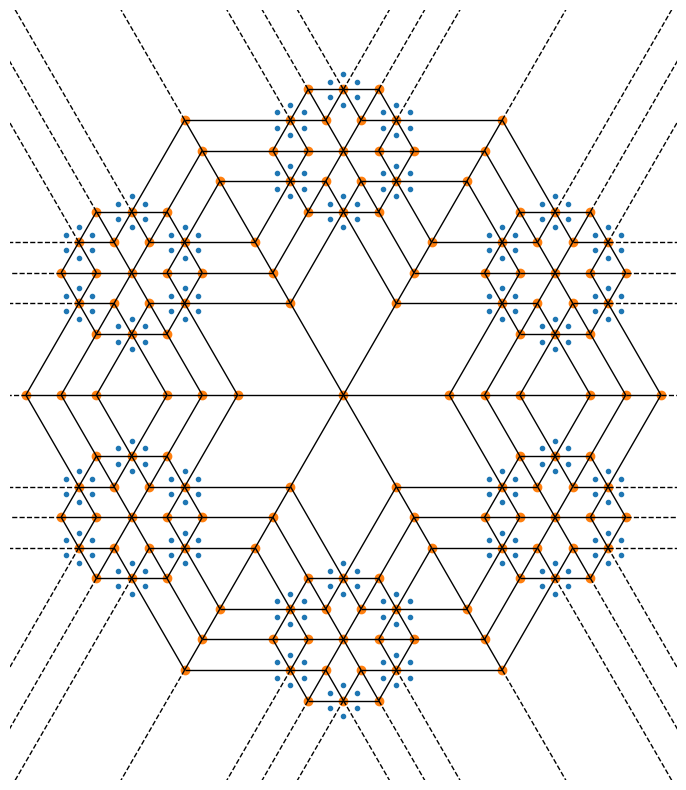

In [27]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

def mandala(n_iter, n_points, radius):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    ax.set_aspect('equal', adjustable='box')

    angles = np.linspace(0, 2*np.pi * (1 - 1/n_points), num=n_points) + np.pi/2
    xy = np.array([[0, 0]])
    for k in range(n_iter):
        t1 = np.array([])
        t2 = np.array([])
        for i in range(xy.shape[0]):
            t1 = np.append(t1, xy[i, 0] + radius**k * np.cos(angles))
            t2 = np.append(t2, xy[i, 1] + radius**k * np.sin(angles))

        xy = np.column_stack((t1, t2))
    spatial.voronoi_plot_2d(spatial.Voronoi(xy), ax=ax)
    return fig

n_iter = 3
n_points = 6
radius = 4

fig = mandala(n_iter, n_points, radius)
plt.show()

## Функции многомерной обработки изображений (scipy.ndimage)

**Обработка изображений** — это выполнение операций над изображением по получению информации или улучшенной копии этого изображения из оригинала. Пакет **scipy.ndimage** состоит из нескольких функций обработки и анализа изображений, которые нужны для работы с массивами с произвольной размерностью.

Наиболее распространенные задачи обработки изображений:
* Ввод / вывод, отображение изображений;
* Основные манипуляции – кадрирование, переворачивание, вращение и т.д;
* Фильтрация изображений – устранение шумов, резкость;
* Сегментация изображения – маркировка пикселей, соответствующих различным объектам классификация и т.д.

Пакет **misc** в SciPy поставляется с некоторыми базовыми изображениями. 

Любые изображения собой комбинацию цветов, представленных числами в матричном формате. Машина понимает и манипулирует изображениями только на основе этих чисел, например **RGB**.

Давайте посмотрим статистическую информацию об изображении:

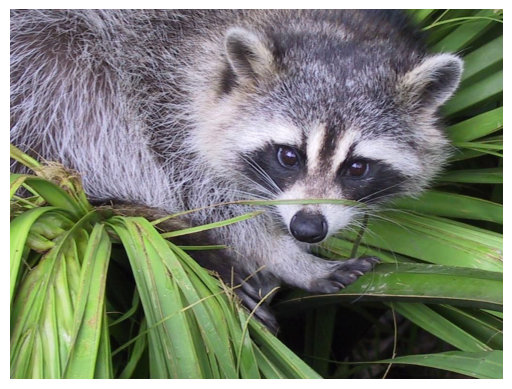

In [28]:
import matplotlib.pyplot as plt
from scipy import datasets

# Загружаем изображение енота (raccoon)
face = datasets.face()

# Отображаем картинку
plt.imshow(face)
plt.axis('off') # Убираем оси для красоты
plt.show()

Любое изменение значения числа в представлении изображения приводит к изменению исходного изображения. Давайте выполним некоторые геометрические преобразования на изображении. 

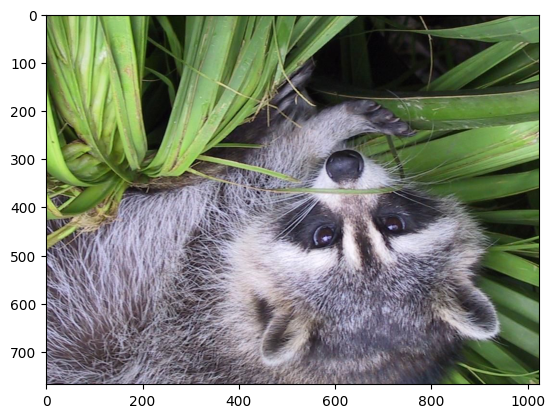

In [29]:
# face = misc.face()
flip_ud_face = np.flipud(face)

import matplotlib.pyplot as plt
plt.imshow(flip_ud_face)
plt.show()

Размытие широко используется для уменьшения шума на изображении. Выполним операцию фильтра и увидим изменения на изображении. 

/tmp/ipykernel_19297/2323014114.py:1: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc, ndimage


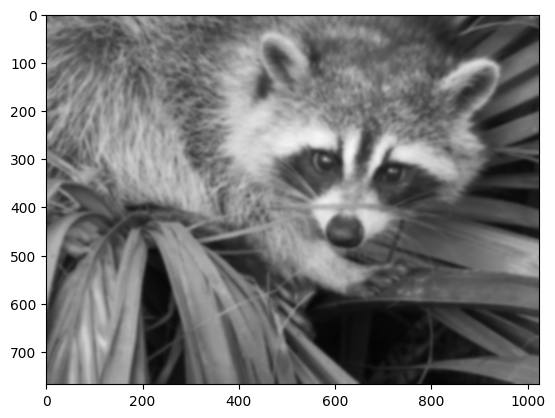

In [30]:
from scipy import misc, ndimage

# face = misc.face()
blurred_face = ndimage.gaussian_filter(face, sigma=3)

plt.imshow(blurred_face)
plt.show()

## Статистика (scipy.stats)

Все статистические функции находятся в подпакете **scipy.stats**. Список доступных случайных величин также можно получить из строки документации для подпакета **stats**. Этот модуль содержит большое количество вероятностных распределений, а также растущую библиотеку статистических функций.

In [31]:
from scipy import stats
# help(stats)

Пусть  $X$  — класс, реализующий некоторое распределение. Конкретное распределение с параметрами $params$ можно получить как $X(params)$. У него доступны следующие методы:

* ```X(params).rvs(size=N)``` — генерация выборки размера  N  (Random VariateS). Возвращает numpy.array;
* ```X(params).cdf(x)``` — значение функции распределения в точке  x  (Cumulative Distribution Function);
* ```X(params).logcdf(x)``` — значение логарифма функции распределения в точке  x;
* ```X(params).ppf(q)``` —  q -квантиль (Percent Point Function);
* ```X(params).mean()``` — математическое ожидание;
* ```X(params).median()``` — медиана ( 1/2 -квантиль);
* ```X(params).var()``` — дисперсия (Variance);
* ```X(params).std()``` — стандартное отклонение = корень из дисперсии (Standard Deviation).

Кроме того для непрерывных распределений определены функции:
* ```X(params).pdf(x)``` — значение плотности в точке  x  (Probability Density Function);
* ```X(params).logpdf(x)``` — значение логарифма плотности в точке  x.

А для дискретных:
* ```X(params).pmf(k)``` — значение дискретной плотности в точке  k  (Probability Mass Function);
* ```X(params).logpdf(k)``` — значение логарифма дискретной плотности в точке  k.

Все перечисленные выше методы применимы как к конкретному распределению X(params), так и к самому классу X. Во втором случае параметры передаются в сам метод. Например, вызов X.rvs(size=N, params) эквивалентен X(params).rvs(size=N). При работе с распределениями и случайными величинами рекомендуем использовать первый способ, посколько он больше согласуется с математическим синтаксисом теории вероятностей.

Попробуем посмотреть работу статистики на примере. В качестве данных возьмём датасет c **моллюсками (abalone)** с **Kaggle**: https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset. Пример: https://python-school.ru/blog/python-for-statissticians/

Здесь мы будем использовать библиотеку для манипулирования данными **Pandas**. Если с ней не знаком, можешь посмотреть мой ролик: https://www.youtube.com/watch?v=cEeY0opsVMw

In [32]:
import pandas as pd
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Датасет содержит физические параметры моллюсков: рост, диаметр, высоту, вес раковины и т.д. Также присутствует один категориальный признак — пол моллюска. Ключевым атрибутам является количество колец у моллюска, определяющего его возраст.

Посмотрим на количество наблюдений, среднее, стандартное отклонение, максимальное и минимальное значения:

In [33]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Чтобы проверить имеет ли тот или иной атрибут **нормальное распределение**, можно воспользоваться двумя критериями Python-библиотеки **scipy** с модулем **stats**.

В основе проверки на "нормальность" лежит проверка гипотез. **Нулевая гипотеза** – данные распределены нормально, альтернативная гипотеза – данные не имеют нормального распределения.

Проведем первый **критерий Шапиро-Уилк**, возвращающий значение вычисленной статистики и p-значение. В качестве критического значения в большинстве случаев берется 0.05. При p-значении меньше 0.05 мы вынуждены отклонить нулевую гипотезу.

Проверим распределение атрибута **Shell_weight (вес панцыря)**:

In [34]:
import scipy

stat, p = scipy.stats.shapiro(data['Shell weight']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.970, p-value=0.000
Отклонить гипотезу о нормальности


Второй тест по **критерию согласия Пирсона**, который тоже возвращает соответствующее значение статистики и p-значение:

In [35]:
stat, p = scipy.stats.normaltest(data['Shell weight']) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=261.120, p-value=0.000
Отклонить гипотезу о нормальности


В качестве следующего примера использования подпакета **stats** попробуем **сгенерировать равномерное распределение**: 

In [36]:
from scipy.stats import uniform

print(uniform.cdf([0, 1, 2, 3, 4, 5], loc = 1, scale = 4))

[0.   0.   0.25 0.5  0.75 1.  ]


Далее попробуем **сравнить две выборки**, которые могут быть либо из одного, либо из другого распределения, и мы хотим проверить, имеют ли эти выборки одинаковые статистические свойства.

**ttest_ind** – вычисляет *T-критерий Стьюдента* для двух независимых выборок баллов. Это двусторонний тест для нулевой гипотезы о том, что две независимые выборки имеют идентичные средние (ожидаемые) значения. 

In [37]:
from scipy import stats

# создаём две выборки 
rvs1 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)

print (stats.ttest_ind(rvs1,rvs2))

TtestResult(statistic=np.float64(1.1493589660407446), pvalue=np.float64(0.25068335969959354), df=np.float64(998.0))


## Алгоритмы кластерного анализа (scipy.cluster)

**scipy.cluster** содержит набор алгоритмов кластеризации, например, **K-means**. Кластеризация K-средних – это метод поиска кластеров и центров кластеров в наборе немаркированных данных. Интуитивно, мы можем думать о кластере как о – состоящем из группы точек данных, чьи расстояния между точками малы по сравнению с расстояниями до точек вне кластера. 

In [38]:
from scipy.cluster.vq import kmeans, vq, whiten
from numpy import vstack,array
from numpy.random import rand

# сгенерируем сдучайные данные
data = vstack((rand(100,3) + array([.5,.5,.5]),rand(100,3)))
print(data[:5], '\n')

# почистим данные
data = whiten(data)

# вычисляем K-Means с 3 кластерами
centroids, _ = kmeans(data, 3)
print(centroids, '\n')

# разделим значения по пренадлежности к кластеру
clx, _ = vq(data, centroids)
print(clx)

[[1.40013193 1.19386124 1.49641675]
 [1.40466773 1.13913061 1.12447469]
 [0.61562325 0.65945883 0.71892205]
 [0.75744592 0.58074083 1.49764262]
 [0.73883407 1.2014543  1.07213224]] 

[[2.02485302 0.96253612 1.13777083]
 [0.88050862 1.48254177 1.71181289]
 [2.68703098 2.71613236 2.85210929]] 

[2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 0 0 2 2
 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1
 2 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 1 2 0 1 1 0 0 1 1 0 1 0 0 1 0]


## Compressed Sparse Graph (scipy.sparse.csgraph)

**scipy.sparse.csgraph** включает алгоритмы для работы с **графами**. Например, поиск кратчайшего пути в графе через алгоритм **Дейкстры**. 

In [39]:
import numpy as np
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix

# граф
arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(dijkstra(newarr, return_predecessors=True, indices=0))

(array([0., 1., 2.]), array([-9999,     0,     0], dtype=int32))


Поддерживается множество алгоритмов в их числе **Алгоритм Флойда — Уоршелла, Беллмана — Форда, поиск в глубину, ширину** и т.д. Давайте на примере и посмотрим **поиск в глубину**:

In [40]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_order

graph = [
[0, 1, 2, 0],
[0, 0, 0, 1],
[2, 0, 0, 3],
[0, 0, 0, 0]
]

graph = csr_matrix(graph)
print(graph)

print(depth_first_order(graph, 0))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (0, 2)	2
  (1, 3)	1
  (2, 0)	2
  (2, 3)	3
(array([0, 1, 3, 2], dtype=int32), array([-9999,     0,     0,     1], dtype=int32))


## Ввод и вывод (scipy.io)

Пакет **scipy.io** предоставляет несколько функций, которые помогают управлять файлами в разных форматах, включая **MATLAB, файлы IDL, Matrix Market, Fortran, WAV** и другие.

In [41]:
# загрузка и сохранение файла Matlab

from scipy import io as spio

x = np.ones((3,3))

spio.savemat('f.mat', {'a':a})
data = spio.loadmat('f.mat',struct_as_record=True)
data['a']

array([[(array([[0.45454545]]), array([[-0.]]), array([[3, 2, 1],
               [3, 1, 0]], dtype=int32), array([[-1,  1, -1],
               [-1, -1,  0]], dtype=int32), array([[ 0.38235956,  0.38235956, -0.84119102, -0.        ],
               [ 0.38235956,  0.38235956, -0.84119102, -0.        ]]), array([], shape=(0, 3), dtype=int32), array([[1, 1]], dtype=int32), array([[2]]), array([[2]]), array([[4]]), array([[0., 0.]]), array([[1., 1.]]), array([[0]], dtype=uint8))]],
      dtype=[('paraboloid_scale', 'O'), ('paraboloid_shift', 'O'), ('simplices', 'O'), ('neighbors', 'O'), ('equations', 'O'), ('coplanar', 'O'), ('good', 'O'), ('nsimplex', 'O'), ('ndim', 'O'), ('npoints', 'O'), ('min_bound', 'O'), ('max_bound', 'O'), ('furthest_site', 'O')])

number of channels = 2
length = 246.75371882086168s


/home/lex/code/learning/bfu/prog_in_ai/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


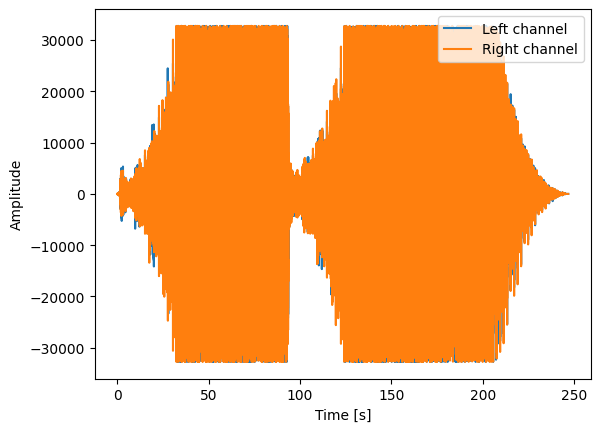

In [44]:
# работа со звуковым wav файлом

from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
from pathlib import Path

wav_fname = pjoin(Path.cwd(), 'fsm-team-escp-light-rain.wav')

samplerate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")
number_of_channels = 2
length = data.shape[0] / samplerate
print(f"length = {length}s")

import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

## Полезные ресурсы

1. Книга Элегантный SciPy | Дэншоу Харриет, Штефан Ван дер Уолт 
<img src="https://cdn.litres.ru/pub/c/cover_415/45707095.webp" width="200" height="200">


2. Книга Python для сложных задач: наука о данных и машинное обучение» | Дж. Вандер Плас
![image.png](https://hsto.org/r/w1560/webt/59/dc/7d/59dc7db578d00991150128.jpeg)


3. Книга ОСНОВЫ НАУЧНЫХ РАСЧЁТОВ НА ЯЗЫКЕ ПРОГРАММИРОВАНИЯ PYTHON С. А. Хайбрахманов - https://www.csu.ru/Shared%20Documents/theor_phys/%D0%A5%D0%B0%D0%B9%D0%B1%D1%80%D0%B0%D1%85%D0%BC%D0%B0%D0%BD%D0%BE%D0%B2%20-%20%D0%9D%D0%B0%D1%83%D1%87%D0%BD%D1%8B%D0%B5%20%D1%80%D0%B0%D1%81%D1%87%D0%B5%D1%82%D1%8B%20%D0%B2%20Python%20(2019).pdf


4. Шпаргалка SciPy - https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_SciPy_Cheat_Sheet_Linear_Algebra.pdf


5. Неплохая лекция по NumPy и SciPy - https://www.youtube.com/watch?v=gofPtInbmvc


6. Краткое руководство по SciPy - https://coderlessons.com/tutorials/python-technologies/uchitsia-stsipi/scipy-kratkoe-rukovodstvo


7. Официальная документация - https://scipy.github.io/devdocs/index.html


8. Неплохая презентация по основам NumPy, SciPy, Matplotlib и Pandas - http://mit.spbau.ru/files/scipy.pdf

К сожалению материалов по SciPy довольно мало, а на русском языке так вообще :(